In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
training_data = pd.read_csv('/content/drive/MyDrive/SVM on stroke/StrokeDataTrain.csv')
training_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,7819,Female,4.0,0,0,No,children,Urban,79.16,16.4,Unknown,0
1,6472,Female,34.0,0,0,Yes,Private,Urban,75.08,28.6,never smoked,0
2,10579,Female,30.0,0,0,No,Govt_job,Rural,66.47,26.9,never smoked,0
3,5936,Female,5.0,0,0,No,children,Urban,91.89,15.1,Unknown,0
4,14287,Female,32.0,0,0,Yes,Private,Urban,68.66,22.6,Unknown,0


##Data preprocessing


shuffle training data

In [ ]:
training_data = training_data.sample(frac=1).reset_index(drop=True)
training_data.to_csv('/content/drive/MyDrive/SVM on stroke/StrokeDataTrain.csv', index=False)
training_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,7819,Female,4.0,0,0,No,children,Urban,79.16,16.4,Unknown,0
1,6472,Female,34.0,0,0,Yes,Private,Urban,75.08,28.6,never smoked,0
2,10579,Female,30.0,0,0,No,Govt_job,Rural,66.47,26.9,never smoked,0
3,5936,Female,5.0,0,0,No,children,Urban,91.89,15.1,Unknown,0
4,14287,Female,32.0,0,0,Yes,Private,Urban,68.66,22.6,Unknown,0


label encode training data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in columns_to_encode:
  encoded_column = encoder.fit_transform(training_data[column])
  training_data[column] = encoded_column


see the encoded data

In [ ]:
training_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,7819,0,4.0,0,0,0,4,1,79.16,16.4,0,0
1,6472,0,34.0,0,0,1,2,1,75.08,28.6,2,0
2,10579,0,30.0,0,0,0,0,0,66.47,26.9,2,0
3,5936,0,5.0,0,0,0,4,1,91.89,15.1,0,0
4,14287,0,32.0,0,0,1,2,1,68.66,22.6,0,0


Now check if there is some null value

In [ ]:
training_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Now remove nulls with mean value

In [ ]:
training_data['bmi'].fillna(training_data['bmi'].mean(), inplace=True)
#check whether null has been replaced with mean
training_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now check if  there are some outliers in the data

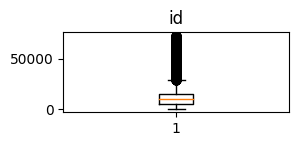

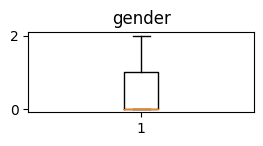

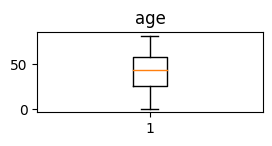

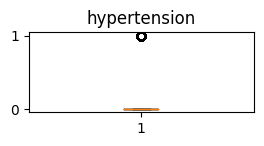

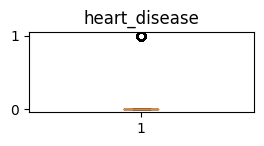

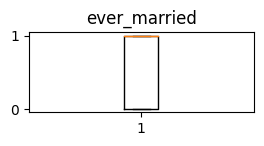

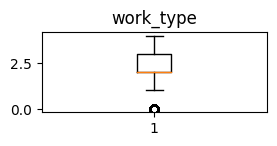

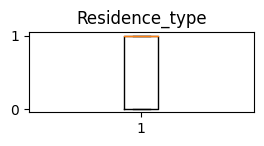

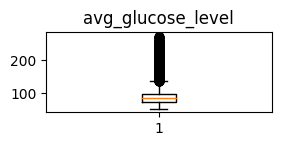

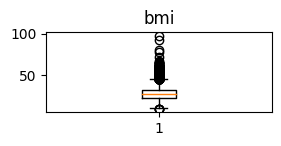

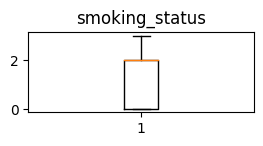

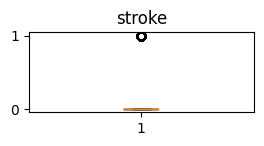

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns
for column in training_data.columns:
  i=1
  plt.subplot(4, 2, i)
  #plt.figure(figsize=(20,12))
  plt.boxplot(training_data[column])
  plt.title(column)
  plt.show()
  i+=1

if data contains outlier then c should be high while training

In [ ]:
X_train = training_data[['id','gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
Y_train = training_data['stroke']

#Run SVM with normal features

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,Y_train)
Y_predd = svc.predict(X_test)
print(Y_predd)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

#Now repeating process on test_set

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/SVM on stroke/test.csv')


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in columns_to_encode:
  encoded_column = encoder.fit_transform(test_data[column])
  test_data[column] = encoded_column


In [ ]:
test_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,2,0,82.54,33.4,0
1,15305,1,70.0,1,0,1,2,1,72.06,28.5,0
2,15306,0,5.0,0,0,0,4,1,103.72,19.5,0
3,15307,0,56.0,0,0,1,0,1,69.24,41.4,3
4,15308,1,32.0,0,0,1,2,0,111.15,30.1,3


#Now put svc prediction on test data

In [ ]:
X_test = test_data[['id','gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
Y_pred = svc.predict(X_test)

Now find out probability

In [ ]:
import numpy as np

# Your code
svc = SVC(probability=True)
svc.fit(X_train, Y_train)
prob = svc.predict_proba(X_test)

# Convert to single column array
col_array = prob[:, 1].reshape(-1, 1)

# Save to CSV file
np.savetxt('probabilities.csv', col_array, delimiter=',')

In [ ]:
#svc = SVC(probability=True)
#svc.fit(X_train, Y_train)
#prob = svc.predict_proba(X_test)
#np.set_printoptions(threshold=np.inf)
#print('\n', prob[:, 1])



 [0.0454015  0.04540573 0.04537816 0.04540164 0.0453959  0.0453912
 0.04539247 0.04540334 0.04537591 0.0453951  0.04539938 0.04543531
 0.04537893 0.04538902 0.04539505 0.04537144 0.0453706  0.04538486
 0.04539351 0.04539387 0.04537977 0.04537044 0.04537602 0.04539113
 0.0453889  0.04539296 0.04538098 0.04539747 0.045368   0.04538781
 0.04540414 0.04537753 0.04538484 0.04539741 0.04539392 0.04537394
 0.04539397 0.04539025 0.04537954 0.04537688 0.04537127 0.04537441
 0.04536171 0.04539108 0.04541622 0.04536748 0.04538703 0.04537496
 0.04539586 0.04537197 0.04536579 0.04535947 0.04536294 0.045368
 0.0454229  0.04536783 0.04538978 0.04537141 0.04538186 0.04536909
 0.04537618 0.04537809 0.04536977 0.04535407 0.04539104 0.04535877
 0.04538321 0.04537509 0.04536525 0.04537089 0.04536943 0.0453637
 0.04535709 0.04540806 0.04534947 0.04540676 0.04537476 0.04534023
 0.0454177  0.04537039 0.04536921 0.04537866 0.04536887 0.04538639
 0.04535479 0.04537284 0.04537364 0.0453715  0.04535287 0.045364

In [ ]:
prob.to_csv("results.csv", index=False)

AttributeError: ignored

##this is to check how good accuracy it shows when we adapt an approach of train test split bcs we were not able to see accuracy in above case

In [ ]:
X = training_data[['id','gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
Y = training_data['stroke']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.svm import SVC
svc = SVC()
from sklearn.metrics import accuracy_score
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

accuracy score with default hyperparameters: 0.9581


SVM with c=100

In [ ]:
svc=SVC(C=100.0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

accuracy score with hyperparameters: 0.9581


with c=1000

In [ ]:
svc= SVC(C=1000.0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

accuracy score with default hyperparameters: 0.9527


In [ ]:
svc = SVC(C=10000.0)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print('accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

accuracy score with default hyperparameters: 0.9581


SVM with linear kernel

In [ ]:
linear_svc = SVC(kernel='poly', C=10.0)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
print('accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))